___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
# import pandas_profiling as pp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### *ii. Load Dataset*

In [3]:
df=pd.read_csv("treetypes.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.0,2748.505160,418.300975,1859.0,2375.0,2753.0,3108.0,3857.0
Aspect,250000.0,156.212172,109.652847,0.0,65.0,125.0,260.0,360.0
Slope,250000.0,16.331052,8.317490,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,250000.0,228.094032,209.630153,0.0,66.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,250000.0,50.897820,61.006967,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,250000.0,1719.966576,1330.817603,0.0,756.0,1318.0,2294.0,7112.0
Hillshade_9am,250000.0,212.370488,30.654582,0.0,195.0,220.0,235.0,254.0
Hillshade_Noon,250000.0,218.510700,22.680947,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,250000.0,134.502764,46.033892,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,250000.0,1521.756904,1107.378373,0.0,734.0,1273.0,1998.0,7150.0


In [6]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
Elevation,1.000000,-0.021623,-0.320425,0.418355,0.123074,0.588262,0.110197,0.223934,0.085570,0.447299,...,0.170538,0.122453,0.028749,0.119437,0.032229,0.066455,0.314775,0.289859,0.289498,0.014087
Aspect,-0.021623,1.000000,0.037395,0.039839,0.054886,0.042044,-0.603792,0.321651,0.639158,-0.072858,...,0.022884,0.020832,0.013902,-0.016936,0.002288,-0.041479,0.046740,-0.045001,0.007843,0.005389
Slope,-0.320425,0.037395,1.000000,-0.063237,0.263713,-0.279899,-0.198674,-0.611509,-0.326459,-0.246624,...,-0.148989,0.077069,-0.025016,-0.046046,-0.004225,0.001406,-0.155871,0.053949,-0.042948,0.075304
Horizontal_Distance_To_Hydrology,0.418355,0.039839,-0.063237,1.000000,0.649110,0.198532,-0.026739,0.085746,0.079973,0.150115,...,0.121505,0.060243,0.071237,-0.005432,0.071577,-0.012239,0.137613,0.074995,0.242607,0.009305
Vertical_Distance_To_Hydrology,0.123074,0.054886,0.263713,0.649110,1.000000,0.000320,-0.092033,-0.132788,-0.038035,-0.026351,...,0.016684,0.079244,0.031426,-0.013443,0.010658,-0.020483,-0.015265,0.061356,0.223416,0.082886
Horizontal_Distance_To_Roadways,0.588262,0.042044,-0.279899,0.198532,0.000320,1.000000,0.014715,0.240571,0.160647,0.481598,...,0.030996,0.036506,0.029809,0.057931,0.024802,0.056740,0.200084,0.121064,0.130754,-0.108043
Hillshade_9am,0.110197,-0.603792,-0.198674,-0.026739,-0.092033,0.014715,1.000000,-0.015798,-0.781836,0.094567,...,0.007701,-0.036473,0.001403,0.033552,0.010811,0.015228,0.011896,0.027435,-0.009456,-0.017806
Hillshade_Noon,0.223934,0.321651,-0.611509,0.085746,-0.132788,0.240571,-0.015798,1.000000,0.613879,0.124245,...,0.106992,-0.006054,0.033843,0.030941,0.022510,-0.031213,0.102361,-0.075429,-0.005544,-0.106578
Hillshade_3pm,0.085570,0.639158,-0.326459,0.079973,-0.038035,0.160647,-0.781836,0.613879,1.000000,0.033912,...,0.073206,0.017222,0.019784,-0.004109,0.003176,-0.027879,0.068212,-0.068641,0.013938,-0.055023
Horizontal_Distance_To_Fire_Points,0.447299,-0.072858,-0.246624,0.150115,-0.026351,0.481598,0.094567,0.124245,0.033912,1.000000,...,0.020585,0.046088,-0.011017,0.004809,-0.008857,0.029484,0.092102,0.049032,0.115436,-0.088740


In [7]:
df["Cover_Type"].value_counts()  ##our target balanced

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

<AxesSubplot:ylabel='Cover_Type'>

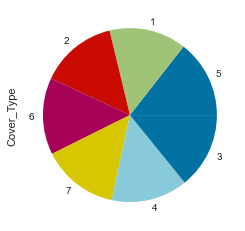

In [8]:
df.Cover_Type.value_counts().plot.pie()

In [9]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column Elevation has 1983 unique values
Column Aspect has 361 unique values
Column Slope has 59 unique values
Column Horizontal_Distance_To_Hydrology has 1294 unique values
Column Vertical_Distance_To_Hydrology has 578 unique values
Column Horizontal_Distance_To_Roadways has 6501 unique values
Column Hillshade_9am has 207 unique values
Column Hillshade_Noon has 165 unique values
Column Hillshade_3pm has 253 unique values
Column Horizontal_Distance_To_Fire_Points has 6487 unique values
Column Wilderness_Area_1 has 2 unique values
Column Wilderness_Area_2 has 2 unique values
Column Wilderness_Area_3 has 2 unique values
Column Wilderness_Area_4 has 2 unique values
Column Soil_Type_1 has 2 unique values
Column Soil_Type_2 has 2 unique values
Column Soil_Type_3 has 2 unique values
Column Soil_Type_4 has 2 unique values
Column Soil_Type_5 has 2 unique values
Column Soil_Type_6 has 2 unique values
Column Soil_Type_7 has 2 unique values
Column Soil_Type_8 has 2 unique values
Column Soil_Type_9

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [12]:
liste = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [27]:
##continiuos columnlkari listeledik

numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


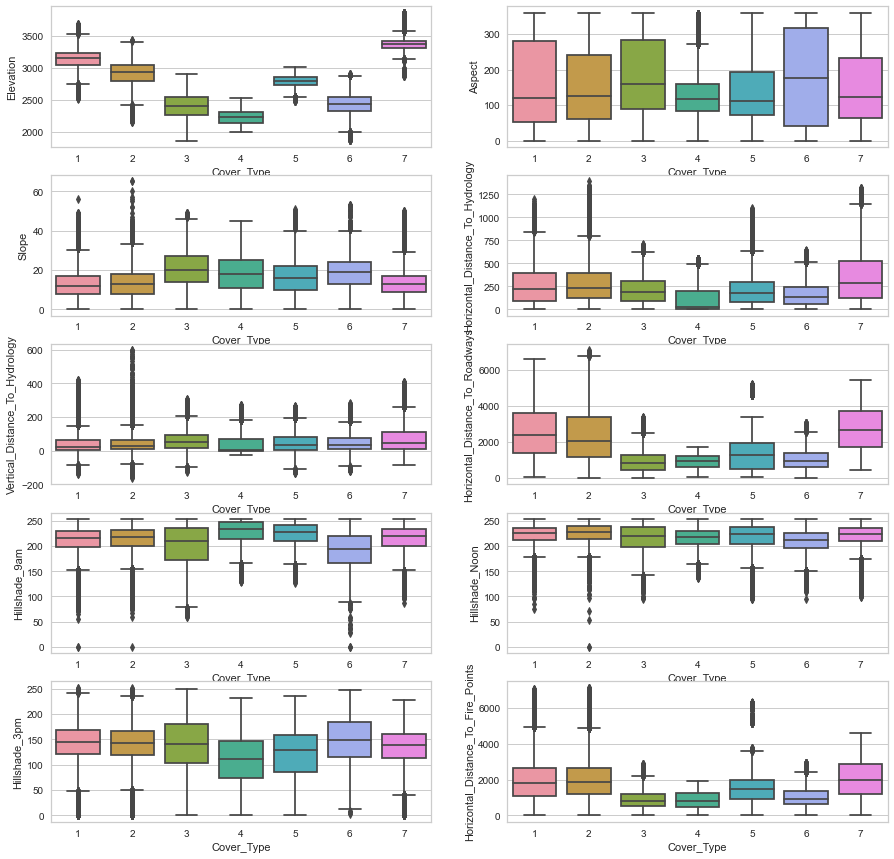

In [29]:
# Outlierlara boxplot ile bakalim
fig , ax = plt.subplots(5,2,figsize=(15,15))
counter = 0
for i in range(5):
    for x in range(2):
        sns.boxplot(y = df[numeric[counter]] , x = df["Cover_Type"], ax=ax[i,x])
        counter +=1

In [36]:
def outlier_report(df, cols,wsk=1.5):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*wsk
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*wsk
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, liste)
res

,lower_limit,upper_limit,iqr,# of outliers
Slope,-8.0,40.0,12.0,850.0
Horizontal_Distance_To_Hydrology,-330.0,726.0,264.0,8113.0
Vertical_Distance_To_Hydrology,-106.0,190.0,74.0,9203.0
Horizontal_Distance_To_Roadways,-1551.0,4601.0,1538.0,12793.0
Hillshade_9am,135.0,295.0,40.0,5637.0
Hillshade_Noon,162.5,278.5,29.0,5911.0
Hillshade_3pm,14.5,258.5,61.0,2195.0
Horizontal_Distance_To_Fire_Points,-1162.0,3894.0,1264.0,10556.0


In [40]:
def outlier_report(df, col_name,wsk=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(wsk*IQR)
    lower_limit = first_quartile-(wsk*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [41]:
##Her column da ne kadar outlier var bakalim

In [43]:
out_cols = []
for col in numeric:
    print(
        f"{col}\nlower:{outlier_report(df, col,3)[0]} \nupper:{outlier_report(df, col,3)[1]}\
        \noutlier:{outlier_report(df, col,3)[2]}\n*-*-*-*-*-*-*"
    )
    if outlier_report(df, col,3)[2] > 0 :
        out_cols.append(col)
print(out_cols)        

Elevation
lower:176.0 
upper:5307.0        
outlier:0
*-*-*-*-*-*-*
Aspect
lower:-520.0 
upper:845.0        
outlier:0
*-*-*-*-*-*-*
Slope
lower:-26.0 
upper:58.0        
outlier:3
*-*-*-*-*-*-*
Horizontal_Distance_To_Hydrology
lower:-726.0 
upper:1122.0        
outlier:732
*-*-*-*-*-*-*
Vertical_Distance_To_Hydrology
lower:-217.0 
upper:301.0        
outlier:957
*-*-*-*-*-*-*
Horizontal_Distance_To_Roadways
lower:-3858.0 
upper:6908.0        
outlier:17
*-*-*-*-*-*-*
Hillshade_9am
lower:75.0 
upper:355.0        
outlier:78
*-*-*-*-*-*-*
Hillshade_Noon
lower:119.0 
upper:322.0        
outlier:194
*-*-*-*-*-*-*
Hillshade_3pm
lower:-77.0 
upper:350.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Fire_Points
lower:-3058.0 
upper:5790.0        
outlier:2394
*-*-*-*-*-*-*
['Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']


### Deal with Outliers

#### *ii. Drop Outliers*

In [44]:
out_cols

['Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points']

In [45]:
df1= df.copy() #Burda df in copy aldik. cunku drop yapacagiz. aradaki farki gormek icin copy yaptik

In [46]:
##outlier lari drop edecegiz
for col in out_cols:
    df1 = df1[(df1[col] > outlier_report(df1, col)[0])
             & (df1[col] < outlier_report(df1, col)[1])]

In [47]:
df1.shape

(201181, 55)

### Now, let's take a closer look at correlation of continuous columns.

***
***

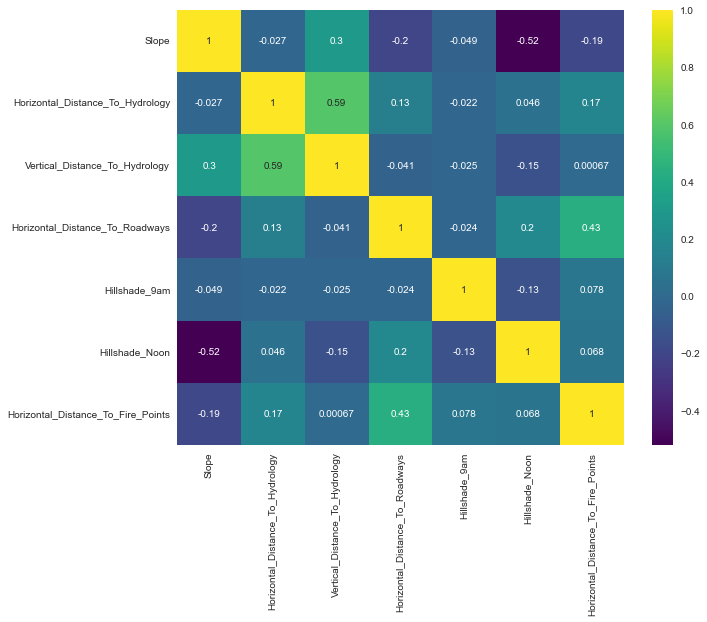

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df1[out_cols].corr(), annot= True, cmap='viridis')
plt.show();


## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [62]:
#ilk olarak horizantal ve vertical distance to hydro nun hipotenus alalim.yeni bir column olusturalim
df1["hypo_distance"] = (df1["Horizontal_Distance_To_Hydrology"]**2 + df1["Vertical_Distance_To_Hydrology"]**2)**.5

In [63]:
#2. suya ve yola horizantal dist.in average bulalim.yeni column ekleyelim
df1["Average_Dist_Road_Hydro"] = (df1.Horizontal_Distance_To_Hydrology + df1.Horizontal_Distance_To_Roadways)/2 

In [64]:
#3. olarak elevation ve veritcal_dist in average bualaim
df1["Average_Elevation_Hydro"] = (df1.Elevation + df1.Vertical_Distance_To_Hydrology) /2

In [65]:
##birlestiridigimiz columnlari dusurelim
df1.drop([
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

In [68]:
#numeric columnlari bulalim. daha rahat islem yapabilmek corr lara bakabilmek icin
numeric_cols = [ col for col in df1.columns if df1[col].nunique() > 7]
numeric_cols

['Aspect',
 'Slope',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'hypo_distance',
 'Average_Dist_Road_Hydro',
 'Average_Elevation_Hydro']

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [69]:
from sklearn.model_selection import train_test_split

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [70]:
X = df.drop("Cover_Type", axis = 1)

y = df["Cover_Type"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [72]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
model_LSVC = LinearSVC(max_iter=2000)
model_LSVC.fit(X_train_scaled, y_train)
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)

In [75]:
model_LSVC.score(X_test_scaled,y_test)

0.6708133333333334

In [76]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(model_LSVC)

In [81]:
visualizer.fit(X_train_scaled, y_train) #train datamizi fit ettik
visualizer.score(X_test_scaled, y_test)
visualizer.show();

In [82]:
from sklearn.ensemble import BaggingClassifier

In [83]:
model_SVC = SVC(kernel="linear")
model_baggingSVC = BaggingClassifier(model_SVC, n_jobs=-1, n_estimators=5, max_samples=0.1)
model_baggingSVC.fit(X_train_scaled, y_train)
y_pred_test = model_baggingSVC.predict(X_test_scaled)
y_pred_train = model_baggingSVC.predict(X_train_scaled)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

TEST REPORT
[[7255 1776   17    0  418   49 1236]
 [2417 5699  279    5 1902  371   61]
 [   0   53 5715 1536  326 2987    0]
 [   0    0  448 9826    0  385    0]
 [ 133 1409  425    0 8550  307    0]
 [   0  235 2121  883  322 7147    0]
 [1228    0   36    0    6    0 9437]]
              precision    recall  f1-score   support

           1       0.66      0.67      0.67     10751
           2       0.62      0.53      0.57     10734
           3       0.63      0.54      0.58     10617
           4       0.80      0.92      0.86     10659
           5       0.74      0.79      0.77     10824
           6       0.64      0.67      0.65     10708
           7       0.88      0.88      0.88     10707

    accuracy                           0.72     75000
   macro avg       0.71      0.71      0.71     75000
weighted avg       0.71      0.72      0.71     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[16908  4228    49     0   974   101  2825]
 

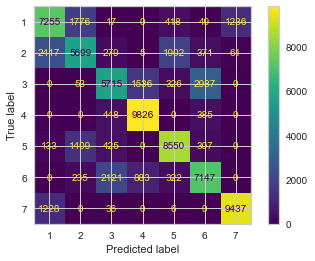

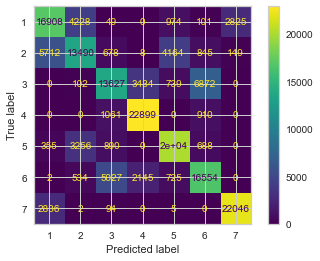

In [85]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(model_baggingSVC, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(model_baggingSVC, X_train_scaled, y_train);

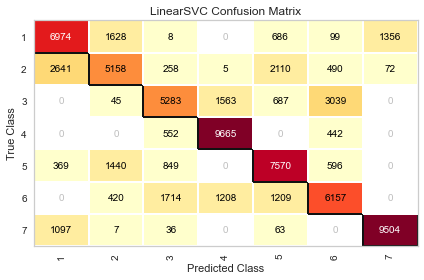

In [87]:
#yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_LSVC)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show();

In [88]:
from sklearn.metrics import f1_score, accuracy_score
scores = {}

In [89]:
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)
scores["model_LSVC"]={}
scores["model_LSVC"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_LSVC"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_LSVC"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_LSVC"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
scores

{'model_LSVC': {'f1_score_test': 0.6654127085964525,
  'f1_score_train': 0.6687314989730763,
  'accuracy_score_test': 0.6708133333333334,
  'accuracy_score_train': 0.6739942857142858}}

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [90]:
#dt import
from sklearn.tree import DecisionTreeClassifier

In [91]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train , y_train)

DecisionTreeClassifier()

In [92]:
y_pred_test = model_Tree.predict(X_test)
y_pred_train = model_Tree.predict(X_train)
scores["model_Tree"]={}
scores["model_Tree"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [93]:
scores["model_LSVC"], scores["model_Tree"],

({'f1_score_test': 0.6654127085964525,
  'f1_score_train': 0.6687314989730763,
  'accuracy_score_test': 0.6708133333333334,
  'accuracy_score_train': 0.6739942857142858},
 {'f1_score_test': 0.9330237277970644,
  'f1_score_train': 1.0,
  'accuracy_score_test': 0.9333866666666667,
  'accuracy_score_train': 1.0})

In [94]:
pd.DataFrame(scores)[["model_Tree","model_LSVC"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_Tree,0.933024,1.000000,0.933387,1.000000
model_LSVC,0.665413,0.668731,0.670813,0.673994


In [95]:
def eval_model(model,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train):
    cm = ConfusionMatrix(model)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()
    print("TEST REPORT")
    # print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    cm.score(X_train, y_train)
    cm.show()
    # print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

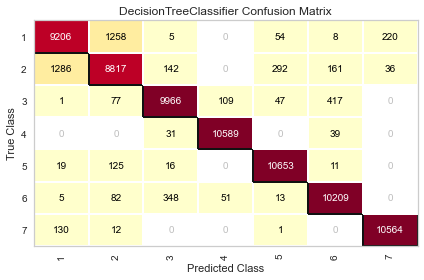

TEST REPORT
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10751
           2       0.85      0.82      0.84     10734
           3       0.95      0.94      0.94     10617
           4       0.99      0.99      0.99     10659
           5       0.96      0.98      0.97     10824
           6       0.94      0.95      0.95     10708
           7       0.98      0.99      0.98     10707

    accuracy                           0.93     75000
   macro avg       0.93      0.93      0.93     75000
weighted avg       0.93      0.93      0.93     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25085
           2       1.00      1.00      1.00     25046
           3       1.00      1.00      1.00     24774
           4       1.00      1.00      1.00     24870
           5       1.00      1.00      1.0

In [96]:
eval_model(model_Tree,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [ ]:
model = DecisionTreeClassifier(random_state=101)
from sklearn.model_selection import   cross_validate
scoress = cross_validate(model, X_train, y_train, scoring = ["accuracy", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scoress, index = range(1, 11))

In [ ]:
df_scores.iloc[:,2:],df_scores.iloc[:,2:].mean()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeClassifier()
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}
model_Tree_gs = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro',
                          cv=5,
                          n_jobs = -1)
model_Tree_gs.fit(X_train, y_train)

In [ ]:
model_Tree_gs.best_params_

In [ ]:
model_Tree_gs.best_score_

In [ ]:
model_Tree_tuned = DecisionTreeClassifier(max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split = 2, splitter='best')
model_Tree_tuned.fit(X_train , y_train)

In [ ]:
y_pred_test = model_Tree_tuned.predict(X_test)
y_pred_train = model_Tree_tuned.predict(X_train)
scores["model_Tree_tuned"]={}
scores["model_Tree_tuned"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_tuned"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_tuned"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_tuned"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [ ]:
pd.DataFrame(scores)

In [ ]:
eval_model(model_Tree_tuned,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [ ]:
model_Tree_bagg = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=20)

model_Tree_bagg.fit(X_train , y_train)
y_pred_test = model_Tree_bagg.predict(X_test)
y_pred_train = model_Tree_bagg.predict(X_train)
print(
    "f1_train:", f1_score(y_train,y_pred_train,average="macro"),
    "f1_test:", f1_score(y_test,y_pred_test,average="macro"),
    "\n",
    "Accuracy_train:", accuracy_score(y_train,y_pred_train),
    "Accuracy_test:", accuracy_score(y_test,y_pred_test)    
      )

In [ ]:
scores["model_Tree_bagg"]={}
scores["model_Tree_bagg"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_bagg"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_bagg"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_bagg"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg"]].T

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100)

model_RF.fit(X_train, y_train)

In [ ]:
y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg","model_RF"]].T

In [ ]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="f1_macro",
                             refit=True,
                             n_jobs=-1)

In [ ]:
eval_model(model_RF,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [ ]:
model = model_RF
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [ ]:
pd.DataFrame(scores)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier().fit(X_train , y_train)
y_pred_test = model_XGB.predict(X_test)
y_pred_train = model_XGB.predict(X_train)
scores["model_XGB"]={}
scores["model_XGB"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_XGB"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_XGB"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_XGB"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)

In [ ]:
eval_model(model_XGB,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [ ]:
fi = pd.DataFrame(model_XGB.feature_importances_, index=list(X_train.columns), columns=["fi"])
fi = fi.sort_values("fi",ascending=False)
fi

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

In [ ]:
comp = pd.DataFrame(scores)
comp.loc[["accuracy_score_test","accuracy_score_train"]].plot.barh()

# F1 Score Comparison

In [ ]:
comp.loc[["f1_score_test","f1_score_train"]].plot.barh()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___